# Implementing convolutional and recurrent neural networks
By Brett Naul (UC Berkeley)

In this exercise we'll explore how to implement basic convolutional and recurrent neural networks for classifying image and sequence data. The networks we'll see here differ from state-of-the-art classification techniques mostly in scale: we'll be training smaller networks on small datasets, whereas more powerful classifiers are much deeper, contain more complicated connections between layers, and are trained using enormous quantities of data.

*Based on various notebooks from the [`keras` examples](https://github.com/fchollet/keras/tree/master/examples) repository.*

In [1]:
# Imports / plotting configuration
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
plt.rcParams['image.cmap'] = 'viridis'
np.random.seed(13)

In [2]:
import json
import os

# Change this to `'tensorflow'` if you prefer
backend = 'theano'
config = {'image_dim_ordering': 'tf', 'epsilon': 1e-07, 
          'floatx': 'float32', 'backend': backend}
!mkdir -p ~/.keras
with open(os.path.expanduser('~/.keras/keras.json'), 'w') as f:
    json.dump(config, f)

In [3]:
!pip install -q keras-tqdm  # Install Jupyter-friendly progress bar 

## Part 1: Fully-connected network for digit recognition
Handwritten digit recognition is one of the most famous neural network applications; even before the recent advances in "deep learning," neural networks were able to achieve excellent performance for this problem and have been used in real-world applications for many years.

The canonical digit recognition example uses the so-called MNIST dataset, which consists of 60,000 training and 10,000 test examples. Each consists of a 28x28 black and white image of a handwritten digit. First we'll load the MNIST dataset and visualize the first few training examples (this may take a minute or two the first time you download the data).

Using TensorFlow backend.


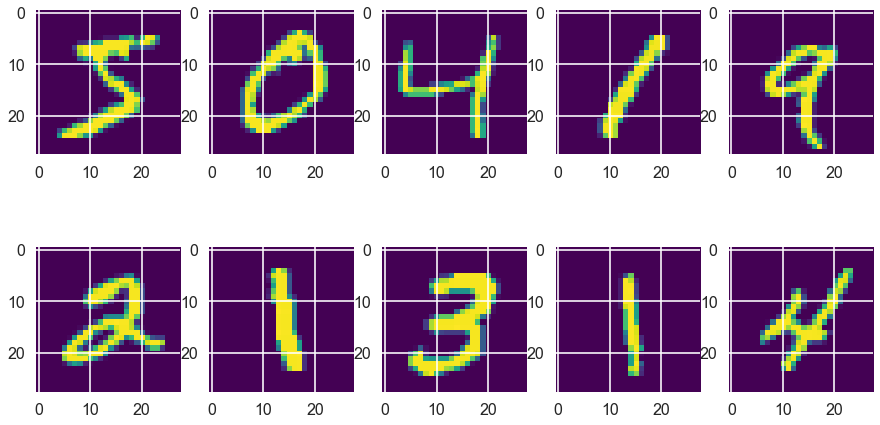

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

nrow = 28; ncol = 28; nb_classes = 10  # MNIST data parameters
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32'); X_test = X_test.astype('float32')  # int -> float
X_train = X_train.reshape(-1, nrow * ncol); X_test = X_test.reshape(-1, nrow * ncol)  # flatten
X_train /= 255; X_test /= 255  # normalize pixels to between 0 and 1

# convert class vectors to binary class matrices (i.e., one-hot encoding)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

fig, ax = plt.subplots(2, 5, figsize=(15, 8))
for i in range(10):
    plt.sca(ax.ravel()[i])
    plt.imshow(X_train[i].reshape(nrow, ncol))

We'll start with our old friend the single-layer perceptron that we implemented in the "Basic Neural Network Exercise." The perceptron consists of a single fully-connected (a.k.a. dense) layer with some activation function, plus an output that we pass to the softmax function. An example of a `keras` implementation of such a network is given below; you'll want to use this as the template for the rest of your models in this exercise.

The steps below should mostly be self-explanatory, but here's a quick breakdown:
- `Sequential` is a `keras` class that allows us to add new layers one at a time
- `Dense` is a fully-connected layer; the `input_shape` argument is only needed in the first layer
- `Activation` passes the output of the previous layer through a specified activation function
- `compile` prepares the underlying `tensorflow` or `theano` graph corresponding to the requested model
- `rmsprop` is a variant of gradient descent that converges more quickly; vanilla gradient descent is rarely used for training neural networks
- "Categorical crossentropy" is the same standard loss function we used in the previous example for evaluating predicted class probabilities

In [5]:
# Define model architecture
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(8, input_dim=nrow * ncol))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 8)             6280        dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 8)             0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            90          activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_______________________

In [6]:
# Fit model to training data and check accuracy
from keras_tqdm import TQDMNotebookCallback

batch_size = 128
nb_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    validation_data=(X_test, Y_test),
                    verbose=0, callbacks=[TQDMNotebookCallback()])
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score: {}; test accuracy: {}'.format(score, accuracy))


Test score: 0.2660430854141712; test accuracy: 0.9286


### Part 1a: Fit model and examine predictions
Look through the above code carefully and make sure you understand each step. Identify a couple of test cases using that are incorrectly classified by our model; the `model.predict_classes` function will be useful (`model.predict` in this case is more like `scikit-learn`'s `predict_proba`). Are these examples particularly difficult or is our model underperforming?

In [1]:
# Examine misclassified examples here
pass

### Part 1b: Multi-layer classifier
Write a function that takes parameters `hidden_size` and `num_layers` and returns a classifier like the one above but with multiple fully-connected layers. Compare the performance of your multi-layer classifier with that of the single-layer network above. Also, check the output of `model.summary()` and see how the number of parameters varies with `hidden_size` and `num_layers`.

In [2]:
# Multi-layer classifier here
pass

## Part 2: Convolutional network
In the above example, we treated our images as one-dimensional vectors and input them to a simple feed-forward network. This has the major disadvantage of ignoring the local structure of the image: each pixel is considered separately from its surroundings. Convolutional networks, on the other hand, apply a number of filters to small regions of each image; these filters are trained to recognize common shapes that appear in the image and are useful for distinguishing classes. Here we'll train a basic convolutional network to perform the same image classification task.

In [3]:
# First we'll reshape the data back into two-dimensional form
X_train = X_train.reshape(X_train.shape[0], nrow, ncol, 1)
X_test = X_test.reshape(X_test.shape[0], nrow, ncol, 1)
input_shape = (nrow, ncol, 1)  # only 1 channel since the images are black and white

NameError: name 'X_train' is not defined

### Part 2a: Simple convolutional network
First, implement a simple convolutional network consisting of a single convolutional layer, a single dense ReLU layer, and a softmax output. The structure should look basically like the single-layer network from earlier, but with a couple of additions.

A couple of hints:
- The `Conv2D` layer takes parameters `nb_filter` for the number of filters, and `nb_row` and `nb_col` for the filter dimensions; try a small number (e.g. 12) of small (e.g. 3 x 3) filters to start.
- Since a convolutional layer expects 2D inputs and a fully-connected layer expects 1D inputs, you'll want to add a `Flatten()` layer inbetween; this is just like the flattening we performed the MNIST inputs themselves before passing them to our fully-connected network, except applied to the intermediate values of our network.
- This is a more computationally-intensive training procedure, so try reducing `nb_epoch` to something like 5.

In [4]:
from keras.layers import Conv2D, Flatten

# Convolutional network here
pass

Using TensorFlow backend.


### Part 2b: Deep-ish convolutional network
Part of the reason the above network is so slow is because of the connection between the convolutional and fully-connected layers: the convolutional layer's weights consist of just a few small filters, but its output is large (roughly 28x28x{# filters}), so the following fully-connected layer needs roughly 28x28x{# filters}x{hidden layer size} parameters...in other words, a lot. For this reason, it's common to insert a pooling layer after a convolutional layer, which reduces the output size considerably. The most common type of pooling is max pooling, primarily because of its simplicity. For more about pooling see, e.g., the [CS 231n lecture notes](http://cs231n.github.io/convolutional-networks/#pool) about convolutional architectures.

Extend the network above by first replacing the first dense layer with a max pooling layer; the `MaxPooling2D` layer takes a 2-dimensional tuple `pool_size` which controls the size of regions that are pooled together. Experiment with this parameter and see how the training time changes; then try adding additional convolutional+pooling layers to form a deeper network. Check the output of `model.summary()` to see how the number of parameters changes depending on whether you apply pooling after a convolutional layer.

In [5]:
from keras.layers import MaxPooling2D

# Convolutional network w/ pooling here
pass

### Part 2c: Regularization
Because of the extremely high number of parameters contained in deep convolutional networks, the chances of overfitting your model to the test data are rather high. The term "regularization" is something of a catch-all for techniques that try to mitigate this overfitting behavior. Here we'll try adding a couple of approaches to our existing network: dropout and weight penalization.

Dropout is a technique that randomly sets some fraction neuron activations to zero during training; the idea is that the network will learn to cope with this by developing multiple different representations for the various patterns in the data, and thereby increase its robustness to unseen data. For validation/test data, dropout is then disabled to generate the best predictions possible.

Weight penalization is a standard idea from linear regression (there it's called ridge regression/LASSO/elastic net, among other things). For each set of weights, a penalty is added to the loss function that is proportional to the magnitude of the coefficients; the result is that the network prefers a combination of many smaller weights rather than some extremely large weights, which again (hopefully) should lead to a more robust model.

Extend your network by adding dropout layers between the convolutional layers, and/or by adding $\ell_2$ regularization to the weights in an existing layer. Does this help reduce the gap between the training and test error? Dropout in `keras` is simply another layer; regularization can be passed into an existing layer with the keyword argument `W_regularizer=l2({some small value})`.

In [6]:
from keras.layers import Dropout
from keras.regularizers import l2

# Convolutions + pooling + dropout/regularization

## Part 3: Recurrent neural network
Recurrent neural networks are typically used to process sequence data, such as text data, time series, etc. In this case, we'll treat each image as a one-dimensional sequence of pixels and process them sequentially using recurrent layers. This is generally not the preferred way to handle image data as it somewhat distorts the spatial structure, but as we'll see the results aren't too bad.

In [7]:
# First, reshape the data into one-dimensional sequences
X_train = X_train.reshape(X_train.shape[0], -1, 1)
X_test = X_test.reshape(X_test.shape[0], -1, 1)
input_shape = X_train.shape[1:]

NameError: name 'X_train' is not defined

The most popular type of recurrent cell is called a "Long Short-Term Memory" cell, or LSTM. Follow the same structure as above and implement a simple recurrent neural network classifier using the `LSTM` layer. 

- Note that a recurrent cell takes sequences as inputs, but can output either sequences (i.e. a new value each time it processes a value from the input), or individual values (i.e. only one value after the entire sequence is processed). In `keras` this is controlled using the `return_sequences` keyword argument.
- Recurrent networks generally use different activations than convolutional networks; you can omit the `Activation` layers here and just use the `LSTM` cell's default, which is tanh.
- Training LSTMs is computationally-intensive so for now keep your hidden layer sizes small and only use the first 250 training examples; this won't be enough to train an effective model but you'll at least see the steps needed to do so given more time/computing power.

In [8]:
from keras.layers import LSTM

# LSTM classifier here
pass

## Part 4: CIFAR10 dataset (optional)
Another standard neural network test case is the CIFAR10 image dataset, which consists of 60,000 32x32 color images from 10 classes. This dataset is available in `keras` as `keras.datasets.cifar10`. Use one of the above network architectures and see how it performs on this (more difficult) problem.

In [ ]:
from keras.datasets import cifar10

# Repeat w/ cifar10 dataset
pass